In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Divar.csv')
df.head()

/tmp/ipython-input-2117368115.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Copy of Divar.csv')


,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[df['cat3_slug'] == 'villa' , 'price_value'].nunique()

1

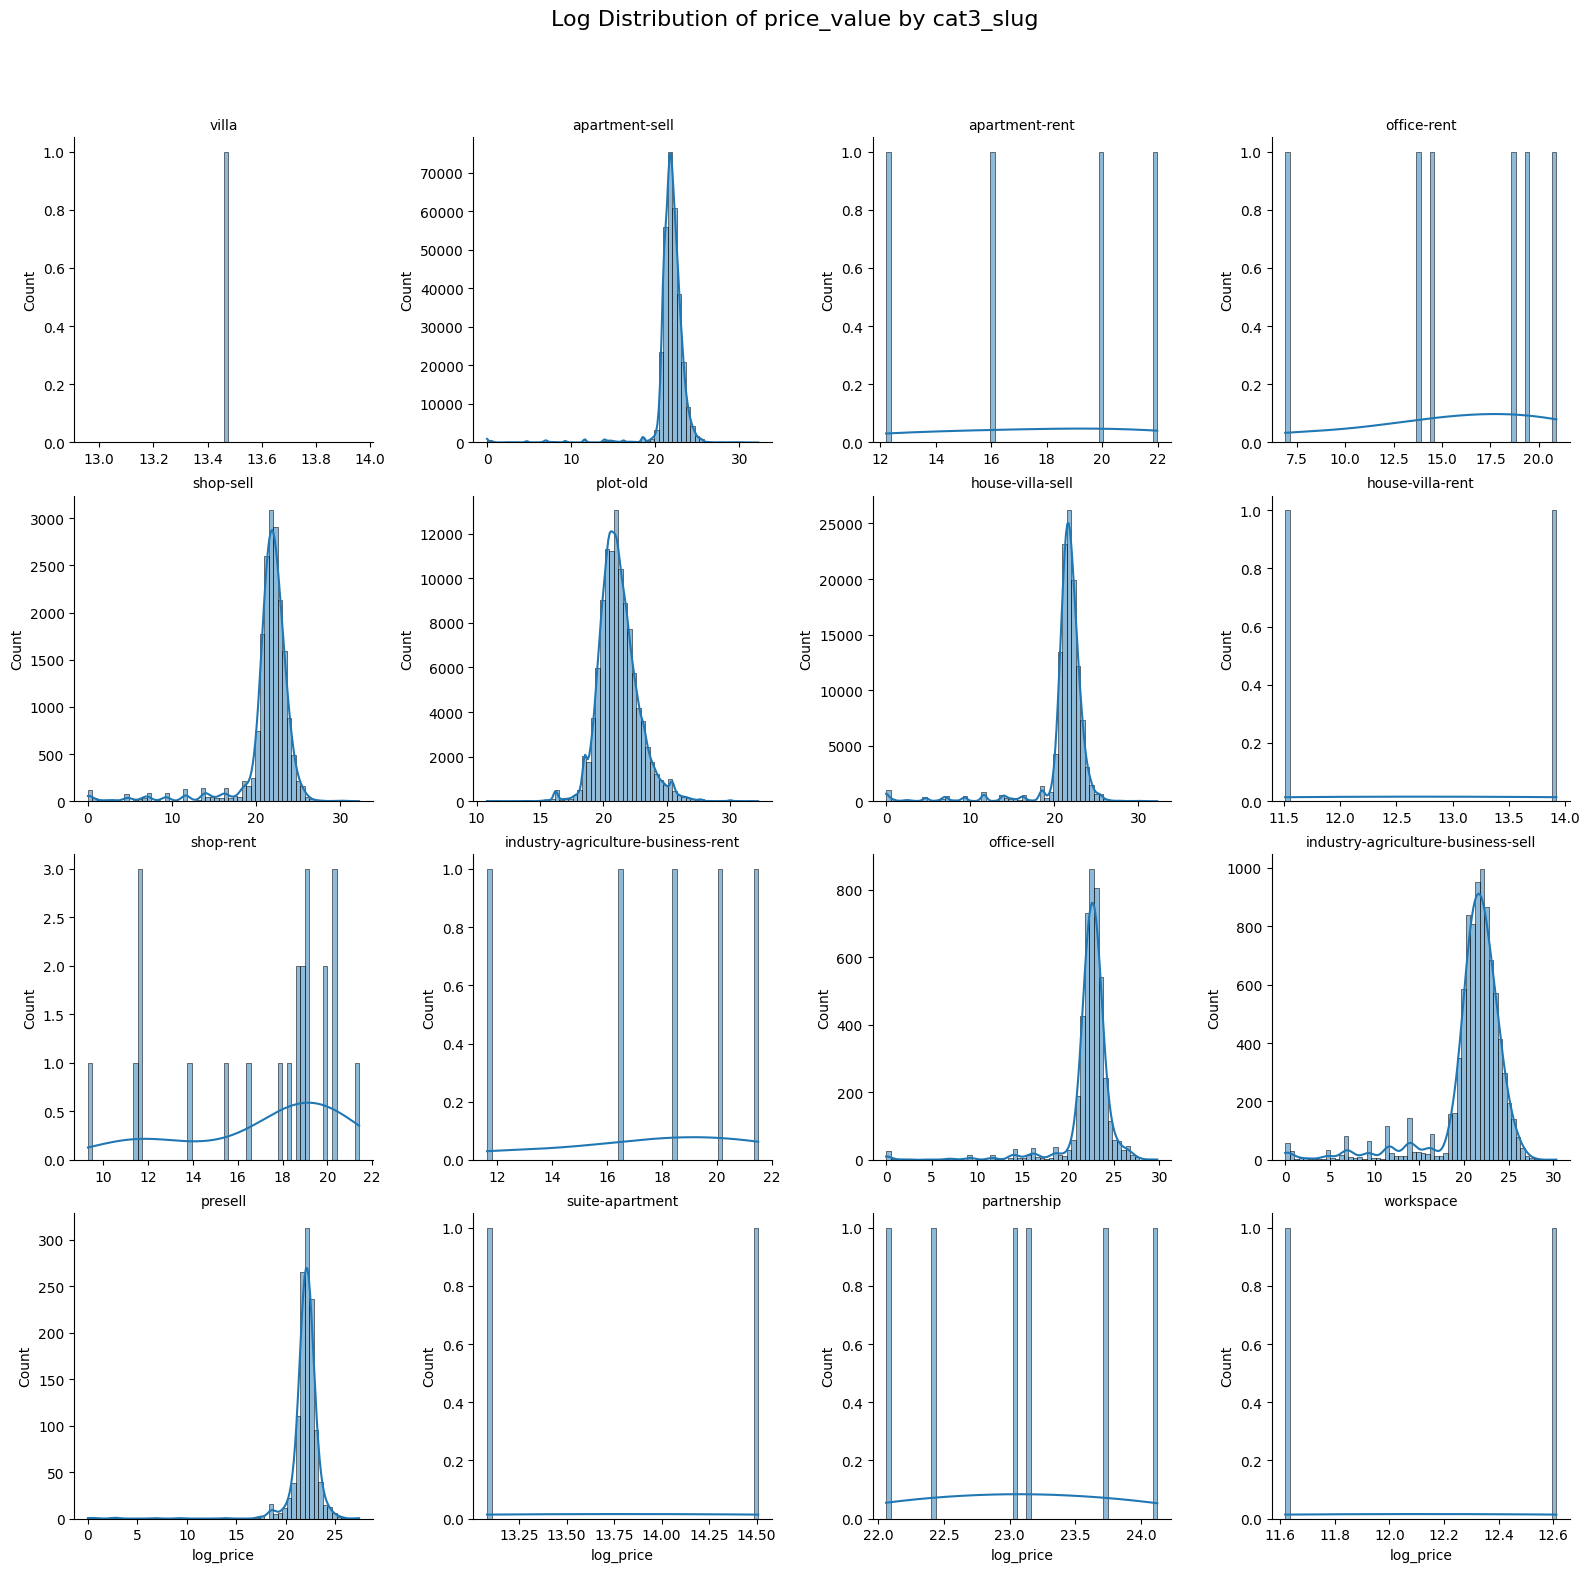

In [ ]:
# 4

df["log_price"] = np.log1p(df["price_value"])

g = sns.FacetGrid(df, col="cat3_slug", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "log_price", kde=True, bins=60)

g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Log Distribution of price_value by cat3_slug", fontsize=16)
plt.show()

In [ ]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])

In [ ]:
df['month_number'] = df['created_at_month'].dt.month

<Axes: >

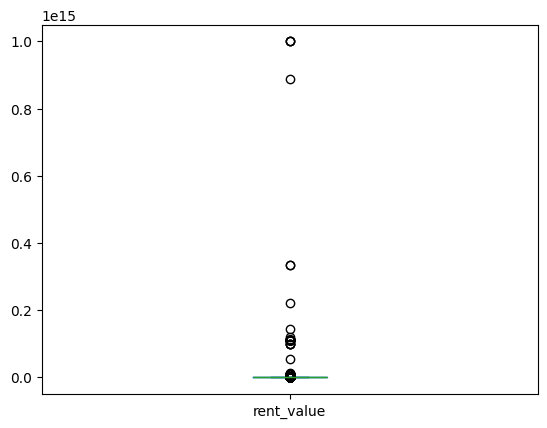

In [ ]:
df['rent_value'].plot(kind='box')

In [ ]:
df['rent_mode'].value_counts()

,count
rent_mode,
مقطوع,292081
مجانی,59241
توافقی,1672


In [ ]:
df_rent = df.loc[(df['rent_type'] == 'rent_credit') & (df['rent_mode'] == 'مقطوع' ),['rent_value','created_at_month']]

In [ ]:
df_rent.describe()

,rent_value,created_at_month
count,8.055600e+04,80556
mean,7.365239e+07,2024-06-30 00:25:33.740503552
min,1.000000e+05,2022-06-01 00:00:00
25%,4.500000e+06,2024-06-01 00:00:00
50%,1.000000e+07,2024-07-01 00:00:00
75%,2.400000e+07,2024-08-01 00:00:00
max,1.300000e+11,2024-12-01 00:00:00
std,1.930815e+09,NaN


In [ ]:
!pip install jdatetime

In [ ]:
import jdatetime
from datetime import datetime

# تابع برای تبدیل تاریخ میلادی به شمسی
def gregorian_to_shamsi(gregorian_date):
    """
    تبدیل تاریخ میلادی به هجری شمسی
    """
    try:
        if pd.isna(gregorian_date):
            return None

        # تبدیل به تاریخ شمسی
        shamsi_date = jdatetime.date.fromgregorian(
            year=gregorian_date.year,
            month=gregorian_date.month,
            day=gregorian_date.day
        )

        # فرمت کردن تاریخ به صورت رشته
        return shamsi_date.strftime("%Y/%m/%d")

    except Exception as e:
        print(f"Error converting {gregorian_date}: {e}")
        return None

# اعمال تبدیل روی ستون created_at_month - نام تابع تصحیح شد
df_rent['created_at_month_shamsi'] = df_rent['created_at_month'].apply(gregorian_to_shamsi)

# نمایش نتایج
print(df_rent[['created_at_month', 'created_at_month_shamsi']].head())

   created_at_month created_at_month_shamsi
15       2024-06-01              1403/03/12
17       2024-09-01              1403/06/11
18       2024-08-01              1403/05/11
21       2024-08-01              1403/05/11
36       2024-11-01              1403/08/11


In [ ]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80556 entries, 15 to 999996
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rent_value               80556 non-null  float64       
 1   created_at_month         80556 non-null  datetime64[ns]
 2   created_at_month_shamsi  80556 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
# اضافه کردن ستون سال شمسی
df_rent['shamsi_year'] = df_rent['created_at_month_shamsi'].apply(
    lambda x: int(x.split('/')[0]) if pd.notna(x) else None
)
# ایجاد یک dictionary برای mapping ماه‌های شمسی به نام‌ها
shamsi_month_names = {
    1: 'فروردین',
    2: 'اردیبهشت',
    3: 'خرداد',
    4: 'تیر',
    5: 'مرداد',
    6: 'شهریور',
    7: 'مهر',
    8: 'آبان',
    9: 'آذر',
    10: 'دی',
    11: 'بهمن',
    12: 'اسفند'
}

# استخراج ماه عددی از تاریخ شمسی و تبدیل به نام ماه
df_rent['shamsi_month_number'] = df_rent['created_at_month_shamsi'].apply(
    lambda x: int(x.split('/')[1]) if pd.notna(x) else None
)

# تبدیل عدد ماه به نام ماه
df_rent['shamsi_month_name'] = df_rent['shamsi_month_number'].map(shamsi_month_names)

In [ ]:
df_rent.drop(columns=['created_at_month_shamsi','shamsi_month_number','created_at_month'],inplace=True)

In [ ]:
df_rent.shamsi_year.unique()

array([1403, 1402, 1401])

In [ ]:
df_rent.loc[df_rent['shamsi_year'] == 1401,['rent_value','shamsi_month_name']].value_counts()

,,count
rent_value,shamsi_month_name,
30000000.0,خرداد,1
45000000.0,تیر,1
70000000.0,مرداد,1
75000000.0,خرداد,1


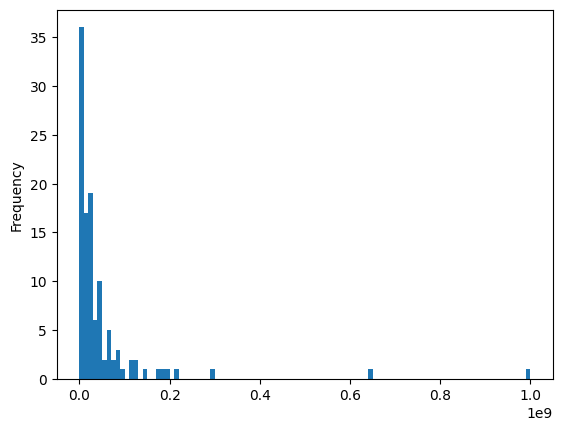

In [ ]:
df_rent_402 = df_rent.loc[df_rent['shamsi_year'] == 1402,['rent_value','shamsi_month_name']]
df_rent_402['rent_value'].plot(kind='hist',bins=100);

In [ ]:
lower_bound_402 =  1000000
upper_bound_402 = 250000000

print(f"Lower bound 402: {lower_bound_402:.2f}")
print(f"Upper bound 402: {upper_bound_402:.2f}")

df_rent_402 = df_rent_402[(df_rent_402['rent_value'] >= lower_bound_402) & (df_rent_402['rent_value'] <= upper_bound_402)].copy()

Lower bound 402: 1000000.00
Upper bound 402: 250000000.00


Text(0.5, 1.0, '1402 rent values after removing outliers')

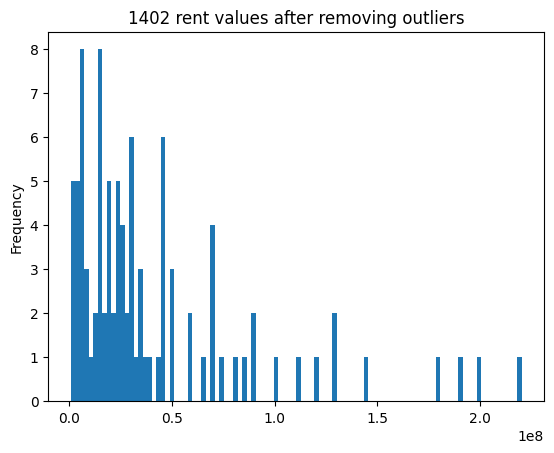

In [ ]:
df_rent_402['rent_value'].plot(kind='hist',bins=100)
plt.title('1402 rent values after removing outliers')

In [ ]:
df_rent_403 = df_rent.loc[df_rent['shamsi_year'] == 1403,['rent_value','shamsi_month_name']]

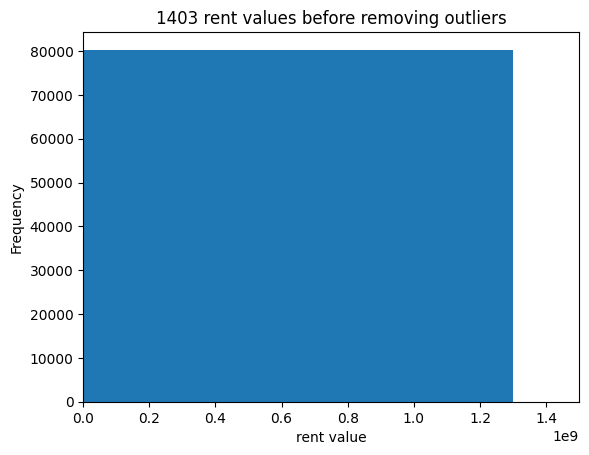

In [ ]:
df_rent_403['rent_value'].plot(kind='hist',bins=100)
plt.title('1403 rent values before removing outliers')
plt.xlim(0,1500000000)
plt.xlabel('rent value');

In [ ]:
df_rent_403.describe()

,rent_value
count,8.043900e+04
mean,7.368279e+07
std,1.932213e+09
min,1.000000e+05
25%,4.500000e+06
50%,1.000000e+07
75%,2.400000e+07
max,1.300000e+11


In [ ]:
Q1_403 = df_rent_403['rent_value'].quantile(0.25)
Q3_403 = df_rent_403['rent_value'].quantile(0.75)
IQR_403 = Q3_403 - Q1_403

# lower_bound_403 = Q1_403 - 1.5 * IQR_403 --> منفی
lower_bound_403 = 1000000 # logical minimum
upper_bound_403= Q3_403 + 1.5 * IQR_403

df_rent_clean = df_rent_403[
    (df_rent_403['rent_value'] >= lower_bound_403) &
    (df_rent_403['rent_value'] <= upper_bound_403)
]
print(lower_bound_403)
print(upper_bound_403)

1000000
53250000.0


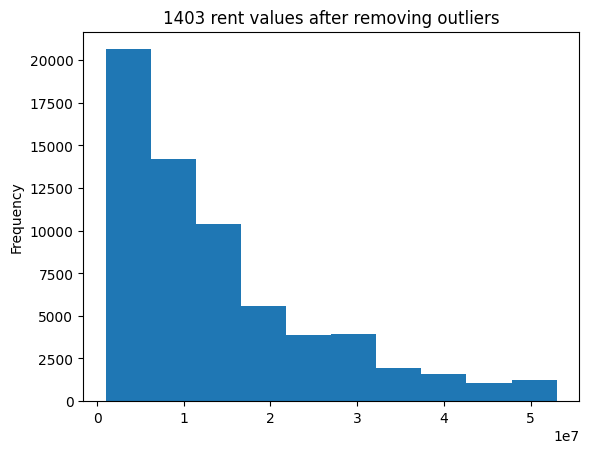

In [ ]:
df_rent_clean['rent_value'].plot(kind='hist')
plt.title('1403 rent values after removing outliers');

In [ ]:
monthly_stats = df_rent_clean.groupby('shamsi_month_name')['rent_value'].agg(['mean', 'median', 'count']).reset_index()
monthly_stats

,shamsi_month_name,mean,median,count
0,آبان,1.690997e+07,12500000.0,273
1,آذر,1.672414e+07,15000000.0,29
2,اردیبهشت,1.366711e+07,10000000.0,11629
3,تیر,1.410209e+07,10000000.0,14435
4,خرداد,1.339544e+07,10000000.0,13880
5,شهریور,1.486796e+07,11000000.0,8077
6,فروردین,1.839317e+07,15000000.0,338
7,مرداد,1.412766e+07,10000000.0,14185
8,مهر,1.487744e+07,11000000.0,1632


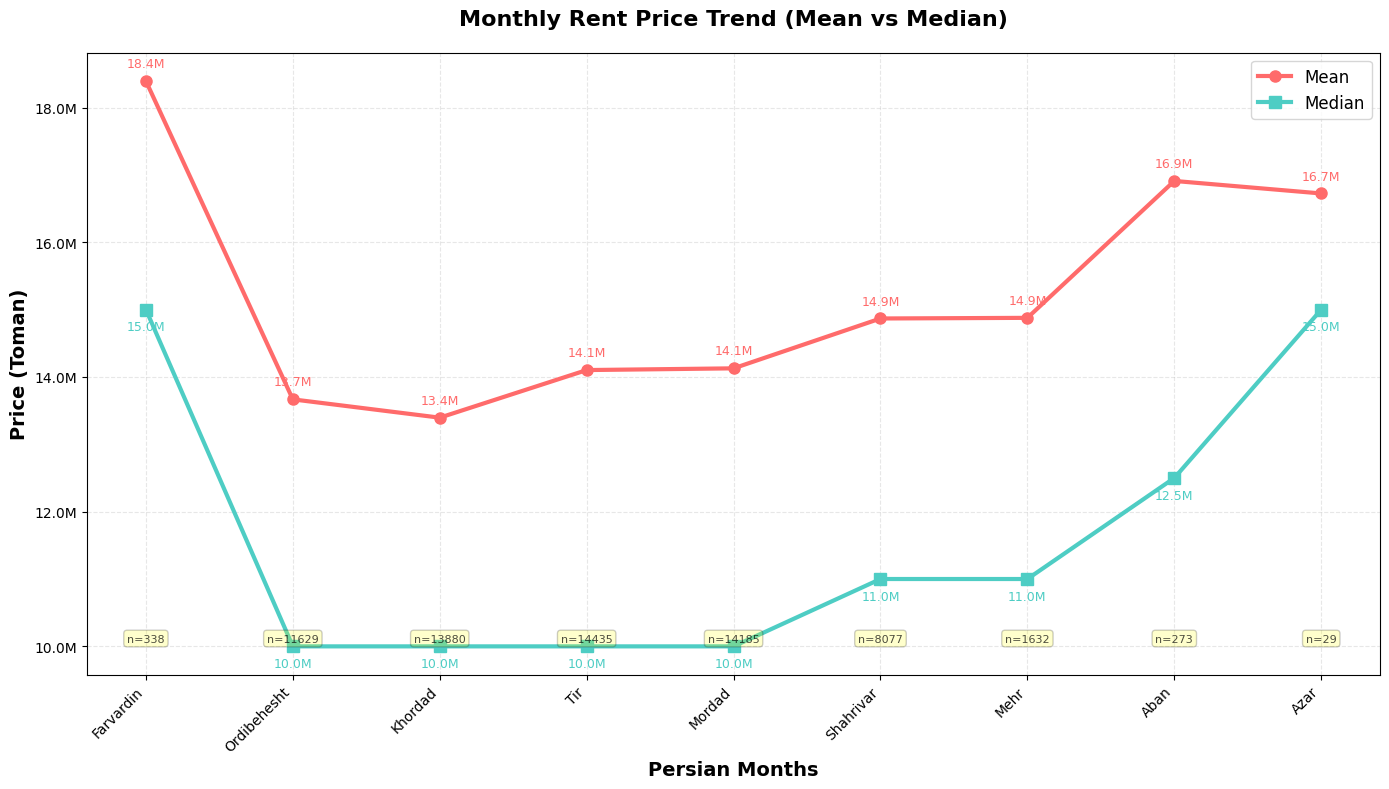

Monthly Rent Price Statistics:
shamsi_month_name       mean     median  count
        Farvardin 18393170.0 15000000.0    338
      Ordibehesht 13667110.0 10000000.0  11629
          Khordad 13395440.0 10000000.0  13880
              Tir 14102090.0 10000000.0  14435
           Mordad 14127660.0 10000000.0  14185
        Shahrivar 14867960.0 11000000.0   8077
             Mehr 14877440.0 11000000.0   1632
             Aban 16909970.0 12500000.0    273
             Azar 16724140.0 15000000.0     29


In [ ]:
# 6



# تنظیمات فونت
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

data = {
    'shamsi_month_name': ['Aban', 'Azar', 'Ordibehesht', 'Tir', 'Khordad', 'Shahrivar', 'Farvardin', 'Mordad', 'Mehr'],
    'mean': [1.690997e+07, 1.672414e+07, 1.366711e+07, 1.410209e+07, 1.339544e+07, 1.486796e+07, 1.839317e+07, 1.412766e+07, 1.487744e+07],
    'median': [12500000.0, 15000000.0, 10000000.0, 10000000.0, 10000000.0, 11000000.0, 15000000.0, 10000000.0, 11000000.0],
    'count': [273, 29, 11629, 14435, 13880, 8077, 338, 14185, 1632]
}

plotdf = pd.DataFrame(data)

# ترتیب ماه‌های شمسی
shamsi_month_order = {
    'Farvardin': 1,
    'Ordibehesht': 2,
    'Khordad': 3,
    'Tir': 4,
    'Mordad': 5,
    'Shahrivar': 6,
    'Mehr': 7,
    'Aban': 8,
    'Azar': 9,
    'Dey': 10,
    'Bahman': 11,
    'Esfand': 12
}

# ایجاد ستون ترتیب و مرتب‌سازی
plotdf['month_order'] = plotdf['shamsi_month_name'].map(shamsi_month_order)
df_sorted = plotdf.sort_values('month_order').reset_index(drop=True)

# ایجاد نمودار
fig, ax = plt.subplots(figsize=(14, 8))

# رسم خطوط میانگین و میانه
line1 = ax.plot(df_sorted['shamsi_month_name'], df_sorted['mean'],
                marker='o', linewidth=3, markersize=8, label='Mean', color='#FF6B6B')
line2 = ax.plot(df_sorted['shamsi_month_name'], df_sorted['median'],
                marker='s', linewidth=3, markersize=8, label='Median', color='#4ECDC4')

# تنظیمات ظاهری
ax.set_xlabel('Persian Months', fontsize=14, fontweight='bold')
ax.set_ylabel('Price (Toman)', fontsize=14, fontweight='bold')
ax.set_title('Monthly Rent Price Trend (Mean vs Median)', fontsize=16, fontweight='bold', pad=20)

# اضافه کردن grid
ax.grid(True, alpha=0.3, linestyle='--')

# چرخش برچسب‌های محور x برای خوانایی بهتر
plt.xticks(rotation=45, ha='right')

# اضافه کردن legend
ax.legend(fontsize=12, loc='best')

# فرمت کردن اعداد محور y به صورت خوانا
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# اضافه کردن مقادیر روی نقاط
for i, (mean_val, median_val) in enumerate(zip(df_sorted['mean'], df_sorted['median'])):
    ax.annotate(f'{mean_val/1e6:.1f}M',
                (df_sorted['shamsi_month_name'].iloc[i], mean_val),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                color='#FF6B6B')

    ax.annotate(f'{median_val/1e6:.1f}M',
                (df_sorted['shamsi_month_name'].iloc[i], median_val),
                textcoords="offset points",
                xytext=(0,-15),
                ha='center',
                fontsize=9,
                color='#4ECDC4')

# اضافه کردن تعداد داده‌ها در پس‌زمینه
for i, count in enumerate(df_sorted['count']):
    ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05,
            f'n={count}',
            ha='center', va='bottom', fontsize=8, alpha=0.7,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.2))

# تنظیم layout برای جلوگیری از برش برچسب‌ها
plt.tight_layout()

# نمایش نمودار
plt.show()

# نمایش داده‌ها در کنسول
print("Monthly Rent Price Statistics:")
print(df_sorted[['shamsi_month_name', 'mean', 'median', 'count']].to_string(index=False))

In [ ]:
df_corr = df[['price_value','land_size','building_size','regular_person_capacity','rooms_count','location_longitude','location_latitude','price_mode']]

In [ ]:
df_corr['rooms_count'].value_counts()

,count
rooms_count,
دو,404050
یک,192083
سه,138633
بدون اتاق,75898
چهار,21371
پنج یا بیشتر,13864


In [ ]:
df_corr['rooms_count'].unique()

array(['سه', 'یک', 'دو', 'بدون اتاق', nan, 'چهار', 'پنج یا بیشتر'],
      dtype=object)

In [ ]:
def to_numeric_rooms(x):
  if pd.isna(x):
    return np.nan
  elif x == 'بدون اتاق':
    return 0
  elif x == 'یک':
    return 1
  elif x == 'دو':
    return 2
  elif x == 'سه':
    return 3
  elif x == 'چهار':
    return 4
  elif x == 'پنج یا بیشتر':
    return 5

df_corr['rooms_count'] = df_corr['rooms_count'].apply(to_numeric_rooms)

/tmp/ipython-input-2077044284.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['rooms_count'] = df_corr['rooms_count'].apply(to_numeric_rooms)


In [ ]:
# # filling  regular_person_capacity null values using rooms count capacity mean

# mean_by_rooms = df_corr.groupby('rooms_count')['regular_person_capacity'].transform('mean')
# df_corr['regular_person_capacity'] = df_corr['regular_person_capacity'].fillna(mean_by_rooms)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# ستون هدف
target = 'regular_person_capacity'
features = ['building_size', 'land_size', 'rooms_count']

# انتخاب داده‌هایی که ظرفیت دارند و حداقل یکی از ویژگی‌ها موجود است
train_data = df_corr[df_corr[target].notna() & df_corr[features].notna().any(axis=1)]
X_train = train_data[features].fillna(-1)
y_train = train_data[target]

# داده‌هایی که باید پیش‌بینی بشن
predict_data = df_corr[df_corr[target].isna() & df_corr[features].notna().any(axis=1)]
X_predict = predict_data[features].fillna(-1)

# مدل رگرشن
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی مقادیر خالی
y_pred = model.predict(X_predict)

# جایگزینی مقادیر پیش‌بینی‌شده
df_corr.loc[predict_data.index, target] = y_pred

# در نهایت: پر کردن بقیه مقادیر خالی با میانه (fallback)
median_value = df_corr[target].median()
df_corr[target] = df_corr[target].fillna(median_value)

# بررسی نتیجه
print("تعداد NaN پس از ایمپیوت:", df_corr[target].isna().sum())


تعداد NaN پس از ایمپیوت: 0


/tmp/ipython-input-3722588497.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[target] = df_corr[target].fillna(median_value)


In [ ]:
df['price_mode'].value_counts()

,count
price_mode,
مقطوع,566444
توافقی,5260
مجانی,1902


In [ ]:
df_corr.dropna(subset=['price_value'],inplace=True)
df_corr = df_corr[(df_corr['price_value'] > 0) & (df_corr['price_mode'] == 'مقطوع')]
df_corr.drop(columns=['price_mode'] , inplace=True)

/tmp/ipython-input-2213758349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.dropna(subset=['price_value'],inplace=True)


In [ ]:
df_corr.describe()

,price_value,land_size,building_size,regular_person_capacity,rooms_count,location_longitude,location_latitude
count,5.664440e+05,1.207710e+05,5.651630e+05,566444.000000,454987.000000,370915.000000,370915.000000
mean,1.742368e+10,3.865722e+03,2.522180e+03,7.046196,1.997358,51.552490,35.072987
std,5.888592e+11,1.203427e+05,9.907767e+04,5.567563,0.933246,3.107261,2.324432
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,40.162369,23.636976
25%,1.410000e+09,1.310000e+02,7.900000e+01,3.799575,2.000000,50.564840,34.677080
50%,2.850000e+09,2.000000e+02,1.100000e+02,5.125000,2.000000,51.329426,35.725742
75%,5.923500e+09,3.100000e+02,1.850000e+02,7.425094,2.000000,51.835379,36.350700
max,1.000000e+14,1.000000e+07,1.000000e+07,48.786667,5.000000,64.052490,40.358055


In [ ]:
df['rent_type'].value_counts()

,count
rent_type,
rent_credit,103814
full_credit,147


In [ ]:
from sklearn.preprocessing import RobustScaler

def scale_real_estate_data(df):
    """
    یکسان‌سازی مقیاس داده‌های املاک
    """
    df_scaled = df_corr.copy()

    # ۱. Log Transformation برای ستون‌های با مقیاس بسیار بزرگ
    price_columns = ['price_value', 'land_size', 'building_size']
    for col in price_columns:
        df_scaled[col] = np.log1p(df_scaled[col])

    # ۲. Robust Scaling برای همه ستون‌های عددی
    numeric_columns = ['price_value', 'land_size', 'building_size',
                      'regular_person_capacity', 'rooms_count',
                      'location_longitude', 'location_latitude']

    # فقط ستون‌هایی که در داده وجود دارند
    numeric_columns = [col for col in numeric_columns if col in df_scaled.columns]

    scaler = RobustScaler()
    df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

    return df_scaled, scaler

# اعمال transformation
df_scaled, scaler = scale_real_estate_data(df)

In [ ]:
# df_scaled
corr_mat = df_scaled.corr()
corr_mat

,price_value,land_size,building_size,regular_person_capacity,rooms_count,location_longitude,location_latitude
price_value,1.000000,0.052893,0.077267,0.003596,0.200878,-0.004625,0.051561
land_size,0.052893,1.000000,0.266982,0.157768,0.109924,0.037140,0.032719
building_size,0.077267,0.266982,1.000000,0.489146,0.412244,0.005622,-0.061190
regular_person_capacity,0.003596,0.157768,0.489146,1.000000,0.521597,0.015655,-0.082225
rooms_count,0.200878,0.109924,0.412244,0.521597,1.000000,0.054164,-0.050806
location_longitude,-0.004625,0.037140,0.005622,0.015655,0.054164,1.000000,-0.222594
location_latitude,0.051561,0.032719,-0.061190,-0.082225,-0.050806,-0.222594,1.000000


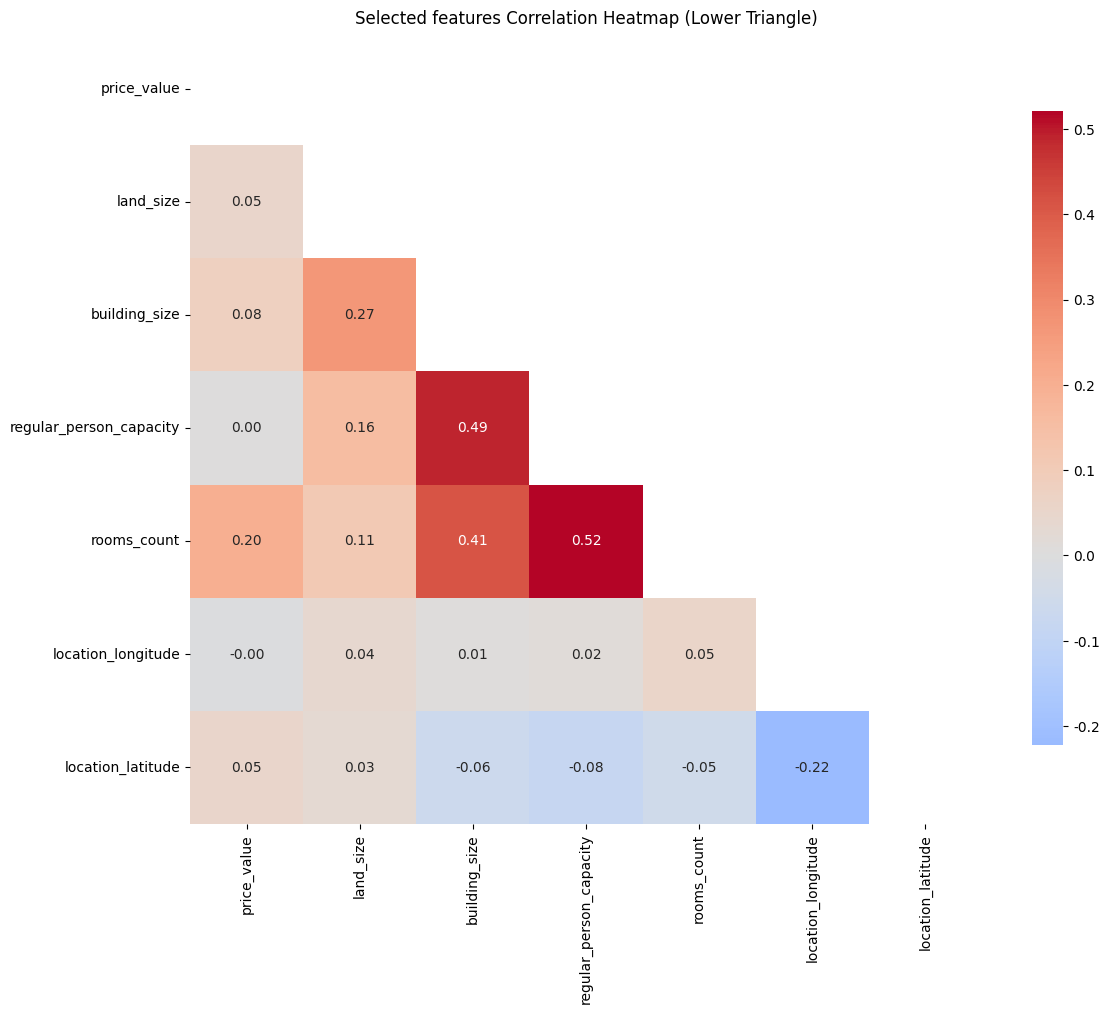

In [ ]:
# 8

mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Selected features Correlation Heatmap (Lower Triangle)')
plt.tight_layout()
plt.show()